# Linear model of factors contributing to Airbnb price in Seattle

In [27]:
#importing libraries and loading file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

df_listings = pd.read_csv(r'/Users/trish/Desktop/UDS/listings.csv')
df_calendar = pd.read_csv('/Users/trish/Desktop/UDS/calendar.csv')
df_reviews = pd.read_csv(r'/Users/trish/Desktop/UDS/reviews.csv')

In [28]:
#rename df_calendar unique id to match that of df_listings and merge dataframes
df_calendar.rename(columns={"listing_id": "id"}, inplace=True)
df = pd.merge(df_listings, df_calendar, on='id')

In [29]:
#choosing numerical and cateegorical values of interest to avoid overfitting and elimnate uneccessary variables like listing number and scraped
df_new = df[['price_y','latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds','instant_bookable','room_type', 'bed_type', 'property_type','zipcode','host_is_superhost']]

In [30]:
#dropping NaNs because imputing doesn't make sense in this case
df2 = df_new.dropna(subset = ['price_y','latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds','instant_bookable','room_type', 'bed_type', 'property_type','zipcode','host_is_superhost'], how = "any")

In [31]:
#checcking to make sure nans are dropped
np.sum(df2.isnull())

price_y              0
latitude             0
longitude            0
accommodates         0
bathrooms            0
bedrooms             0
beds                 0
instant_bookable     0
room_type            0
bed_type             0
property_type        0
zipcode              0
host_is_superhost    0
dtype: int64

In [32]:
df2.shape

(926083, 13)

In [33]:
#function to convert price to float
def fix_price(df, col):
    ''' 
    This function will remove dollar signs, extra zeros, commas from the given column in the given dataframe,
    and convert the column to float.
    
    INPUT:
    df - pandas dataframe
    col - column containing object with price structure to be removed
    
    OUTPUT:
    df - the input dataframe with the chose column replaced with a numerical value
    '''
    df[col] = df[col].str.replace('$','').str.replace('.00','').str.replace(',','')
    df[col] = pd.to_numeric(df[col])
    return df

In [34]:
#convert price to float
fix_price(df2, 'price_y')

/Users/trish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/trish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,price_y,latitude,longitude,accommodates,bathrooms,bedrooms,beds,instant_bookable,room_type,bed_type,property_type,zipcode,host_is_superhost
0,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
1,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
9,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
10,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
14,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
15,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
16,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
20,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
21,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f
22,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,f,Entire home/apt,Real Bed,Apartment,98119,f


In [35]:
#definte cat_cols for dummy function
cat_vars = df2[['instant_bookable','room_type', 'bed_type', 'property_type','zipcode','host_is_superhost']]
cat_vars.head()

,instant_bookable,room_type,bed_type,property_type,zipcode,host_is_superhost
0,f,Entire home/apt,Real Bed,Apartment,98119,f
1,f,Entire home/apt,Real Bed,Apartment,98119,f
9,f,Entire home/apt,Real Bed,Apartment,98119,f
10,f,Entire home/apt,Real Bed,Apartment,98119,f
14,f,Entire home/apt,Real Bed,Apartment,98119,f


In [36]:
#function for creating dummy variables for categorical variables, for use in linear regression model
def create_dummy_df(df, cat_cols, dummy_na):

    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not

    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [37]:
#use function with option to create dummys of NaN values
df3 = create_dummy_df(df2, cat_vars, dummy_na=True)

In [38]:
df3.head()

,price_y,latitude,longitude,accommodates,bathrooms,bedrooms,beds,instant_bookable_t,instant_bookable_nan,room_type_Private room,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99 98122,zipcode_nan,host_is_superhost_t,host_is_superhost_nan
0,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df3.shape

(926083, 63)

In [40]:
#checking for NaNs
np.sum(df3.isnull())

price_y                          62615
latitude                             0
longitude                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
beds                                 0
instant_bookable_t                   0
instant_bookable_nan                 0
room_type_Private room               0
room_type_Shared room                0
room_type_nan                        0
bed_type_Couch                       0
bed_type_Futon                       0
bed_type_Pull-out Sofa               0
bed_type_Real Bed                    0
bed_type_nan                         0
property_type_Bed & Breakfast        0
property_type_Boat                   0
property_type_Bungalow               0
property_type_Cabin                  0
property_type_Camper/RV              0
property_type_Chalet                 0
property_type_Condominium            0
property_type_Dorm                   0
property_type_House      

In [41]:
#dropping null price values
df4 = df3.dropna(subset = ['price_y'], how='any')

In [42]:
#checking for NaNs
np.sum(df4.isnull())

price_y                          0
latitude                         0
longitude                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
instant_bookable_t               0
instant_bookable_nan             0
room_type_Private room           0
room_type_Shared room            0
room_type_nan                    0
bed_type_Couch                   0
bed_type_Futon                   0
bed_type_Pull-out Sofa           0
bed_type_Real Bed                0
bed_type_nan                     0
property_type_Bed & Breakfast    0
property_type_Boat               0
property_type_Bungalow           0
property_type_Cabin              0
property_type_Camper/RV          0
property_type_Chalet             0
property_type_Condominium        0
property_type_Dorm               0
property_type_House              0
property_type_Loft               0
property_type_Other              0
property_type_Tent  

In [43]:
#creating response vector and X table
y = df4['price_y']
X = df4.drop('price_y', axis=1)

In [44]:
y.shape

(863468,)

In [45]:
X.shape

(863468, 62)

In [46]:
#function to fit linear model and print r2 on training and test data
def fit_linear_mod(df, response_col, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test

    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model

    '''

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)


    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(df3, 'price_y')

#print the results fancy
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.6089566474560892.  The rsquared on the test data was 0.6113410872630647.


In [47]:
#function to obtain coefficienat weights for each variable input from X, and print results
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)
#coef_df = coef_df.round({'coefs': 3})

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
15,bed_type_nan,-1.059504e+17,1.059504e+17
10,room_type_nan,3.334511e+16,3.334511e+16
31,property_type_nan,9.052083e+15,9.052083e+15
7,instant_bookable_nan,-3.803195e+15,3.803195e+15
0,latitude,-5.142575e+02,5.142575e+02
1,longitude,-2.710776e+02,2.710776e+02
17,property_type_Boat,1.606787e+02,1.606787e+02
23,property_type_Dorm,-1.536926e+02,1.536926e+02
54,zipcode_98146,-1.286861e+02,1.286861e+02
52,zipcode_98136,-1.265918e+02,1.265918e+02


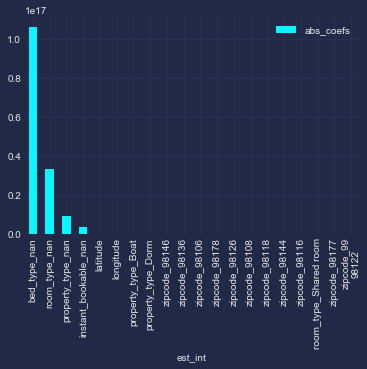

In [48]:
#create dataframe of coefficient values and plot absolute coefficients
coef_df2 = coef_df.head(20)
coef_df2.plot(kind='bar', x='est_int', y='abs_coefs')

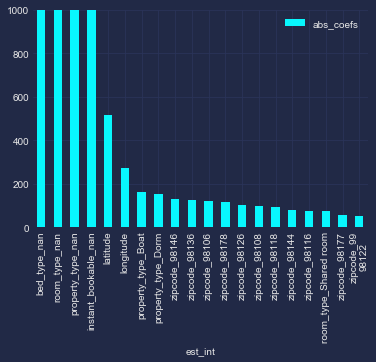

In [49]:
#plot absolute coefficients with y limit to show lower value features
coef_df2.plot(kind='bar', x='est_int', y='abs_coefs', ylim=[0,1000])